In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data = df.drop("id",axis=1) # drop unecessary columns
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.duplicated().sum()

0

In [6]:
data.info() # Showing information about database.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
data.describe() # Showing data's statistical features.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.isnull().sum()/len(df)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

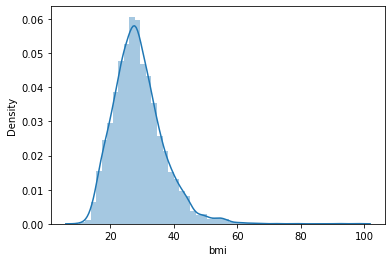

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(data["bmi"],kde=True)
plt.show()

In [11]:
# WE can see this is right skewed.

In [12]:
data["bmi"].fillna(data["bmi"].median(),inplace=True)

In [13]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# Seprate categorical into numerical

In [15]:
num_data = data.select_dtypes(include = [np.number])
cat_data = data.select_dtypes(exclude = [np.number])

In [16]:
num_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [17]:
cat_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


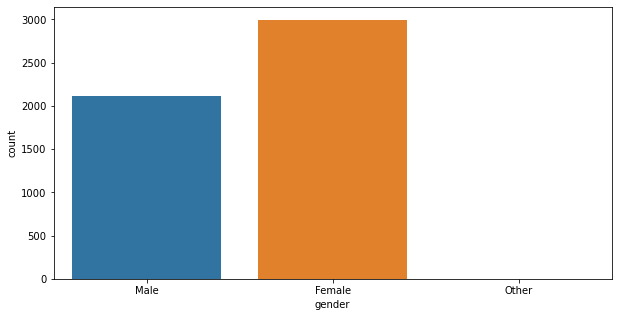

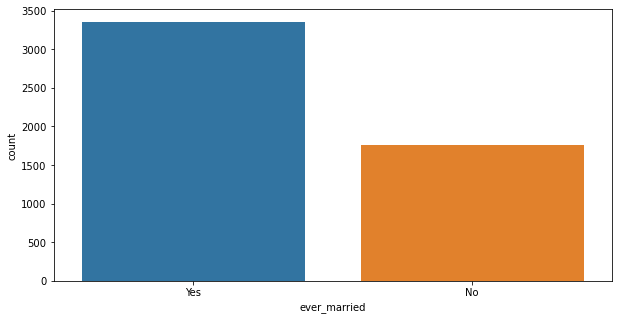

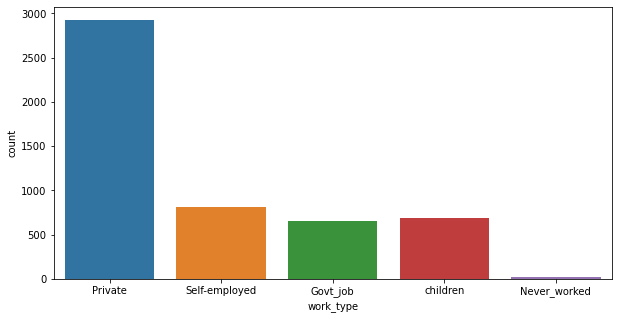

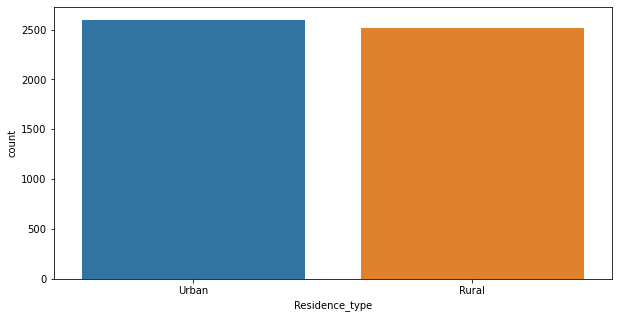

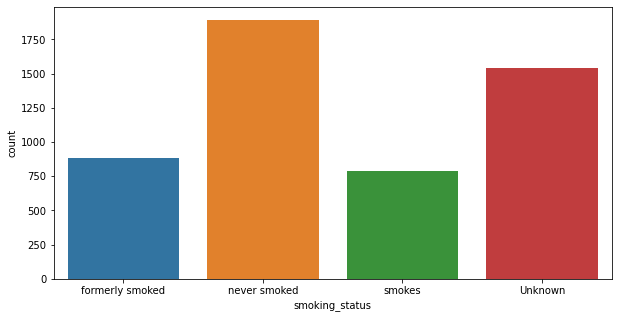

In [18]:
for catfeature in cat_data.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x = data[catfeature])
    plt.show()

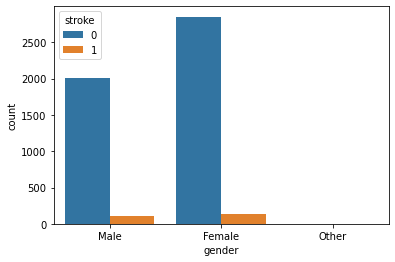

In [19]:
sns.countplot(data=data,x="gender",hue="stroke")
plt.show()

In [20]:
data.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.088187
stroke               4.193284
dtype: float64

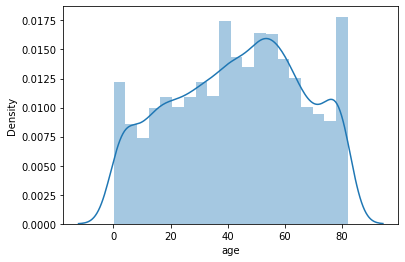

In [21]:
sns.distplot(data["age"],kde=True)
plt.show()

In [22]:
# It is symmetric data.

In [23]:
data.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.635306
stroke               15.589736
dtype: float64

# **Compare gender with stroke**

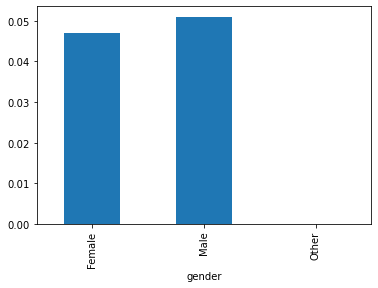

In [24]:
data.groupby("gender")["stroke"].mean().plot(kind="bar")
plt.show()

 # Compare ever_married and heart_disease

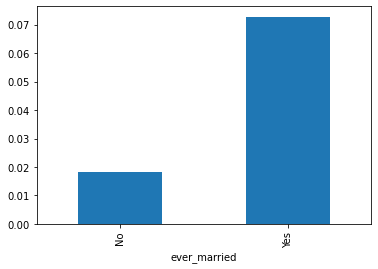

In [25]:
data.groupby("ever_married")["heart_disease"].mean().plot(kind="bar")
plt.show()

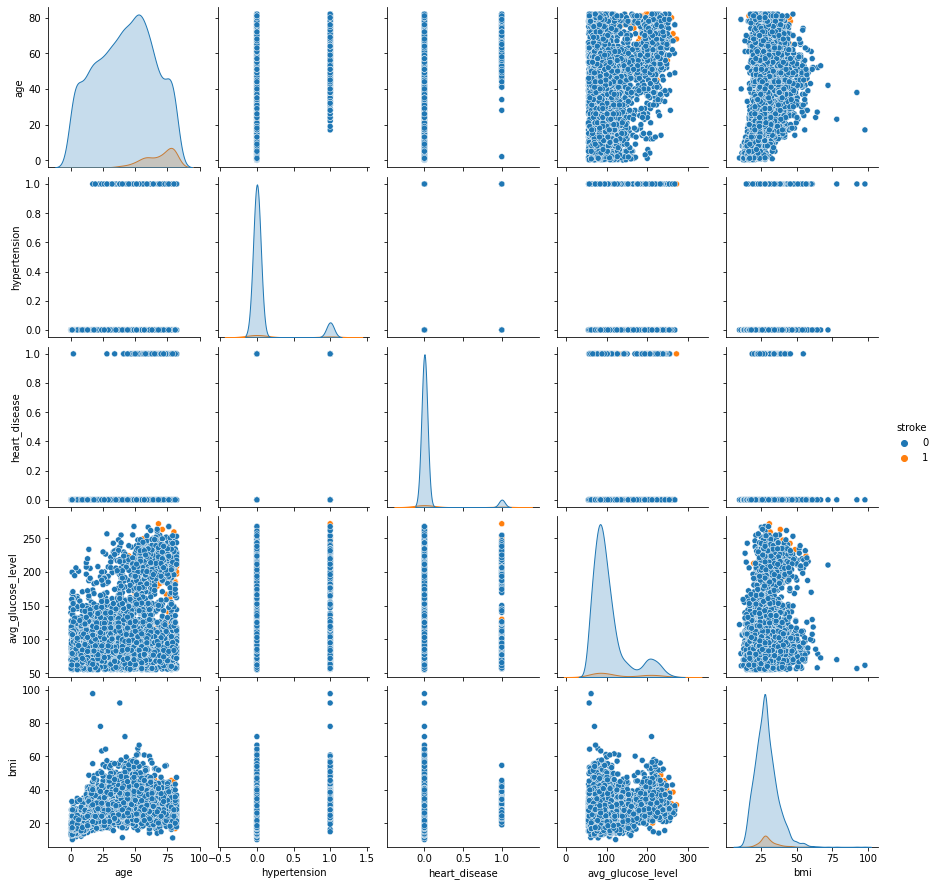

In [26]:
sns.pairplot(data,hue="stroke")
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
LE = LabelEncoder()

In [29]:
df1 = data.copy()
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
for col in cat_data.columns:
    df1[col] = LE.fit_transform(df1[col])
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


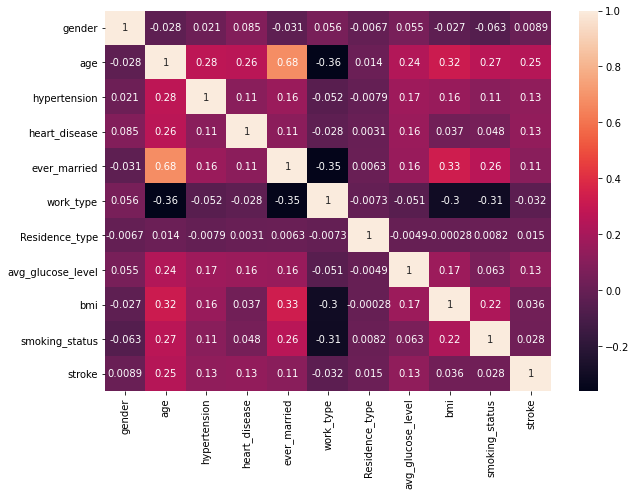

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [32]:
X = df1.drop(["bmi","heart_disease","age","avg_glucose_level","ever_married","gender","Residence_type","smoking_status","work_type","hypertension"],axis=1)
y = df1["stroke"]

In [33]:
X.shape

(5110, 1)

In [34]:
y.shape

(5110,)

 # Standard scaling

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [36]:
X_Scaler = ss.fit_transform(X)

In [37]:
X_Scaler

array([[ 4.41838074],
       [ 4.41838074],
       [ 4.41838074],
       ...,
       [-0.22632726],
       [-0.22632726],
       [-0.22632726]])

# splitting

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaler, y, test_size=0.20, random_state=43)

In [39]:
print(X_train.shape)
print(y_train.shape)

(4088, 1)
(4088,)


In [40]:
print(X_test.shape)
print(y_test.shape)

(1022, 1)
(1022,)


#  building logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [42]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [43]:
# evaluate the model 

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[976,   0],
       [  0,  46]], dtype=int64)

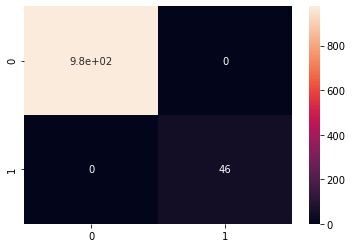

In [49]:
sns.heatmap(cm, annot=True)
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00        46

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



# AUC - ROC

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
score = roc_auc_score(y_test, y_pred)

In [53]:
score

1.0

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

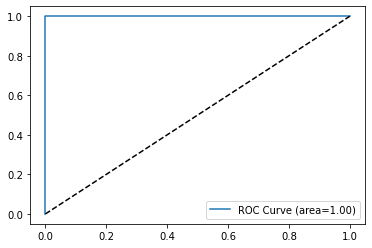

In [55]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# knn

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
pred = knn.predict(X_test)

In [59]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
print(confusion_matrix(y_test, pred))

[[976   0]
 [  0  46]]


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00        46

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



In [62]:
from sklearn.model_selection import cross_val_score

**Choosing a best k-value**

In [63]:
accuracy_rate = []

for i in range(1,25): # number of cluster
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df1, data['stroke'], cv=10) # knn - mean,df1 - independent variable,data["stroke"] - dependent variable.
    accuracy_rate.append(score.mean()) # rate and accuracy of the number of cluster.

In [64]:
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred2 = knn.predict(X_test)
    error_rate.append(np.mean(pred2!=y_test))

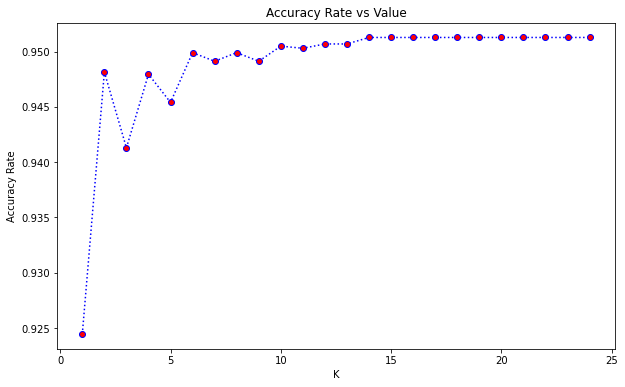

In [65]:
plt.figure(figsize=(10,6))

plt.plot(range(1,25), accuracy_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')

plt.title('Accuracy Rate vs Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

**Elbow Method**

In [66]:
error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

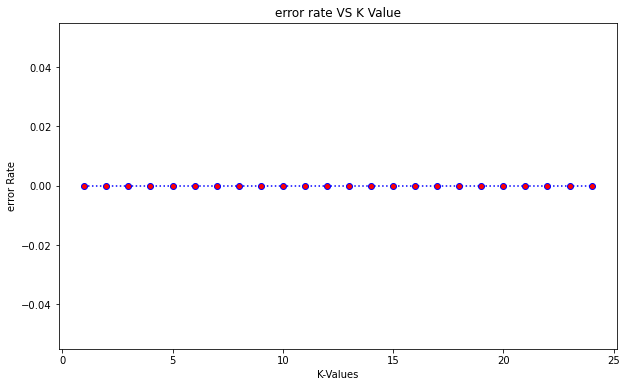

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25), error_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red')
plt.title('error rate VS K Value')
plt.xlabel('K-Values')
plt.ylabel('error Rate')
plt.show()

**Using for loop**

In [68]:
import sklearn
import sklearn.metrics as metrics
from sklearn import preprocessing

In [69]:
for i in range(1,20):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(preprocessing.scale(X_train), y_train)
    pred4 = model.predict(preprocessing.scale(X_test))
    w = metrics.accuracy_score(pred4, y_test)
    print(i)
    print(w)

1
1.0
2
1.0
3
1.0
4
1.0
5
1.0
6
1.0
7
1.0
8
1.0
9
1.0
10
1.0
11
1.0
12
1.0
13
1.0
14
1.0
15
1.0
16
1.0
17
1.0
18
1.0
19
1.0


**Using GridSearchCV**

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'n_neighbors':range(1,25)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [72]:
gridsearch.best_params_

{'n_neighbors': 1}

In [73]:
gridsearch.best_score_

1.0

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
classifier = RandomForestClassifier(n_estimators=100)

In [76]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [79]:
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 1.0


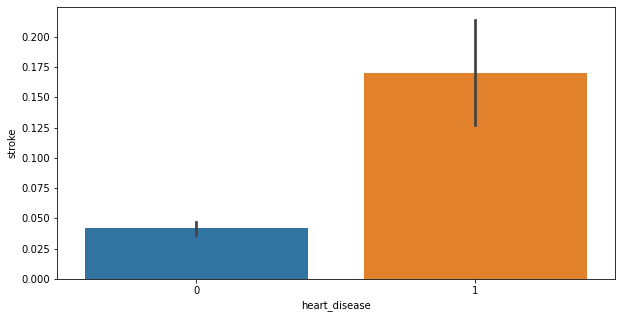

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="heart_disease",y="stroke")
plt.show()

In [81]:
# checking accuracy

In [113]:
#load data with selected features
X = df1.drop(["stroke"],axis=1)
y = df1["stroke"]

In [114]:
# Splitting

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42,stratify=y)

In [116]:
clf = RandomForestClassifier(n_estimators=150)

In [117]:
#train the model

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [118]:
#prediction

y_pred1 = clf.predict(X_test)

In [119]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
print('Accuracy:-', accuracy_score(y_pred1, y_test))

Accuracy:- 0.949119373776908


# Decision tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [122]:
classifier = DecisionTreeClassifier(max_depth=4)

In [123]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [124]:
from sklearn import tree

In [125]:
repres = tree.export_text(classifier)

In [126]:
print(repres)

|--- feature_1 <= 67.50
|   |--- feature_1 <= 47.50
|   |   |--- feature_8 <= 56.30
|   |   |   |--- feature_1 <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  37.50
|   |   |   |   |--- class: 0
|   |   |--- feature_8 >  56.30
|   |   |   |--- feature_8 <= 56.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  56.95
|   |   |   |   |--- class: 0
|   |--- feature_1 >  47.50
|   |   |--- feature_7 <= 161.58
|   |   |   |--- feature_1 <= 56.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  56.50
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  161.58
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|--- feature_1 >  67.50
|   |--- feature_7 <= 257.12
|   |   |--- feature_8 <= 44.85
|   |   |   |--- feature_1 <= 73.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  73.50
|   |   |   |   |--- class: 0
|   |   |--- feature_8 >  44.85
|   |   |   |--

In [127]:
y_pred = classifier.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9481409001956947

# The End